<a href="https://colab.research.google.com/github/aviralKumar13/Colab-NoteBooks/blob/master/Pro_Kabbadi_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from functools import reduce
import glob, os  
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize  
pd.set_option('display.max_columns', 500)
sns.set(style='whitegrid')

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

# configurations for the notebook environment
init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [0]:
index = [0,1,2,3,4,5,6]
season = [0,1,2,3,4,8,26,49]
read_path = "C:/Users/aviral.varshney/Desktop/UpGrad-Hackathon/ProKabbadiTeamData/"
teams_data = [[0 for x in range(50)] for y in range(50)] 
for i in index:
    for j in season:
        teams_data[j][0] =  pd.read_csv(read_path + 'Team All-outs Conceded_'+str(j)+'.csv')
        teams_data[j][1] =  pd.read_csv(read_path + 'Team All-outs Inflicted_'+str(j)+'.csv')
        teams_data[j][2] =  pd.read_csv(read_path + 'Team Average Raid Points_'+str(j)+'.csv')
        teams_data[j][3] =  pd.read_csv(read_path + 'Team Average Tackle Points_'+str(j)+'.csv')
        teams_data[j][4] =  pd.read_csv(read_path + 'Team Avg Points Scored_'+str(j)+'.csv')
        teams_data[j][5] =  pd.read_csv(read_path + 'Team DOD Raid Points_'+str(j)+'.csv')
        teams_data[j][6] =  pd.read_csv(read_path + 'Team Raid Points_'+str(j)+'.csv')
        teams_data[j][7] =  pd.read_csv(read_path + 'Team Successful Raids_'+str(j)+'.csv')
        teams_data[j][8] =  pd.read_csv(read_path + 'Team Successful Tackles_'+str(j)+'.csv')
        teams_data[j][9] =  pd.read_csv(read_path + 'Team Super Raid_'+str(j)+'.csv')
        teams_data[j][10] =  pd.read_csv(read_path + 'Team Super Tackles_'+str(j)+'.csv')
        teams_data[j][11] =  pd.read_csv(read_path + 'Team Tackle Points_'+str(j)+'.csv')
        teams_data[j][12] =  pd.read_csv(read_path + 'Team Total Points Conceded_'+str(j)+'.csv')
        teams_data[j][13] =  pd.read_csv(read_path + 'Team Total Points_'+str(j)+'.csv')


In [0]:
new_player_read = "C:/Users/aviral.varshney/Documents/season7TeamData/season7TeamData/Player"
  
player_all_properties = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', new_player_read + "/*.csv"))))
player_all_properties['unsucess_raid_percent'] = round((player_all_properties['unsuccess_raids'] / player_all_properties['raids'])*100,0)
#player_new_data = pd.read_csv(new_player_read + "/*.csv")


C:\Users\aviral.varshney\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [0]:
read_path_player = "C:/Users/aviral.varshney/Desktop/UpGrad-Hackathon/ProKabbadiPlayerData/"
player_seasonal_properties = [0 for x in range(50)]
for j in season:
    player_seasonal_properties[j] = pd.read_csv(read_path_player + 'Player Successful Raids_'+str(j)+'.csv')

In [0]:
league_season = [1,2,3,4,8,26,49]
teams_league_dataset = [0 for x in range(50)]
for j in league_season:
    teams_league_dataset[j] = pd.read_csv(read_path + 'League_Data_'+str(j)+'.csv')

In [0]:
for j in season:
    
    teams_data[j][0].rename(columns = {"value":"all_out_conceded_"+str(j)+"","rank":"rank"+str(j)+""},inplace=True)
    teams_data[j][1].rename(columns = {"value":"all_out_inflicted_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][2].rename(columns = {"value":"average_raid_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][3].rename(columns = {"value":"average_tackle_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][4].rename(columns = {"value":"average_points_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][5].rename(columns = {"value":"dod_raid_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][6].rename(columns = {"value":"raid_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][7].rename(columns = {"value":"success_raid_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][8].rename(columns = {"value":"success_tackles_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][9].rename(columns = {"value":"super_raids_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][10].rename(columns = {"value":"super_tackles_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][11].rename(columns = {"value":"tackle_points_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][12].rename(columns = {"value":"total_points_conceded_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)
    teams_data[j][13].rename(columns = {"value":"total_points_"+str(j)+"","rank":"rank_"+str(j)+""},inplace=True)

In [0]:
teams_final_dataset = [0 for x in range(50)]

for j in season:
    print(j)
    dfs =[teams_data[j][0],teams_data[j][1],teams_data[j][2],teams_data[j][3],teams_data[j][4],teams_data[j][5],
         teams_data[j][6],teams_data[j][7],teams_data[j][8],teams_data[j][9],teams_data[j][10],teams_data[j][10],
         teams_data[j][11],teams_data[j][12],teams_data[j][13]]

    teams_final_dataset[j] = reduce(lambda left,right: pd.merge(left,right,on=['team_name','team_id']), dfs)

0
1
2
3
4
8
26
49


In [0]:
teams_final_dataset[0].drop(['match_played_x','match_played_y','super_tackles_0_x'],axis=1,inplace=True)
teams_final_dataset[0].rename(columns = {"match_played":"match_played_0","super_tackles_0_y":"super_tackles_0"},inplace=True)
teams_final_dataset[1].drop(['match_played_x','match_played_y','super_tackles_1_x'],axis=1,inplace=True)
teams_final_dataset[1].rename(columns = {"match_played":"match_played_1","super_tackles_1_y":"super_tackles_1"},inplace=True)
teams_final_dataset[2].drop(['match_played_x','match_played_y','super_tackles_2_x'],axis=1,inplace=True)
teams_final_dataset[2].rename(columns = {"match_played":"match_played_2","super_tackles_2_y":"super_tackles_2"},inplace=True)
teams_final_dataset[3].drop(['match_played_x','match_played_y','super_tackles_3_x'],axis=1,inplace=True)
teams_final_dataset[3].rename(columns = {"match_played":"match_played_3","super_tackles_3_y":"super_tackles_3"},inplace=True)
teams_final_dataset[4].drop(['match_played_x','match_played_y','super_tackles_4_x'],axis=1,inplace=True)
teams_final_dataset[4].rename(columns = {"match_played":"match_played_4","super_tackles_4_y":"super_tackles_4"},inplace=True)
teams_final_dataset[8].drop(['match_played_x','match_played_y','super_tackles_8_x'],axis=1,inplace=True)
teams_final_dataset[8].rename(columns = {"match_played":"match_played_8","super_tackles_8_y":"super_tackles_8"},inplace=True)
teams_final_dataset[26].drop(['match_played_x','match_played_y','super_tackles_26_x'],axis=1,inplace=True)
teams_final_dataset[26].rename(columns = {"match_played":"match_played_26","super_tackles_26_y":"super_tackles_26"},inplace=True)
teams_final_dataset[49].drop(['match_played_x','match_played_y','super_tackles_49_x'],axis=1,inplace=True)
teams_final_dataset[49].rename(columns = {"match_played":"match_played_49","super_tackles_49_y":"super_tackles_49"},inplace=True)

In [0]:
# performing merge for league data set and final dataset 
#pd.merge(teams_league_dataset , teams_final_dataset)
for j in league_season:
    
    teams_final_dataset[j] = pd.merge(teams_final_dataset[j],teams_league_dataset[j],on=['team_name'])

In [0]:
#winner_label ={1 : 'Winner', 2 : 'RunnerUp', 3 : 'RunnerUp', 4 :'Looser'  , 5 :'Looser'  , 6 :'Looser'  , 7 :'Looser' , 8 :'Looser' , 9 :'Looser' , 10 :'Looser' , 11 :'Looser' , 12 :'Looser' }
for j in season:

    teams_final_dataset[j]['Rate_concede_'+str(j)+''] = teams_final_dataset[j]['all_out_conceded_'+str(j)+'']/teams_final_dataset[j]['match_played_'+str(j)+'']
    teams_final_dataset[j]['Rate_inflict_'+str(j)+''] = teams_final_dataset[j]['all_out_inflicted_'+str(j)+'']/teams_final_dataset[j]['match_played_'+str(j)+'']
    teams_final_dataset[j]['super_raid_to_raid_'+str(j)+''] = teams_final_dataset[j]['super_raids_'+str(j)+'']/teams_final_dataset[j]['raid_'+str(j)+'']*100
    teams_final_dataset[j]['super_tackle_to_tackle_'+str(j)+''] = teams_final_dataset[j]['super_tackles_'+str(j)+'']/teams_final_dataset[j]['tackle_points_'+str(j)+'']*100
    teams_final_dataset[j]['dod_to_raids_'+str(j)+''] = teams_final_dataset[j]['dod_raid_'+str(j)+'']/teams_final_dataset[j]['match_played_'+str(j)+'']
    teams_final_dataset[j]['bonus_points_'+str(j)+''] = teams_final_dataset[j]['raid_'+str(j)+''] - (teams_final_dataset[j]['success_raid_'+str(j)+''] + teams_final_dataset[j]['super_raids_'+str(j)+''] + teams_final_dataset[j]['dod_raid_'+str(j)+''])
    teams_final_dataset[j]['spt_'+str(j)+''] = teams_final_dataset[j]['super_raids_'+str(j)+''] + teams_final_dataset[j]['super_tackles_'+str(j)+''] + teams_final_dataset[j]['all_out_inflicted_'+str(j)+''] - teams_final_dataset[j]['all_out_conceded_'+str(j)+'']
    teams_final_dataset[j]['differential_points_'+str(j)+''] = teams_final_dataset[j]['total_points_'+str(j)+''] - teams_final_dataset[j]['total_points_conceded_'+str(j)+'']
    teams_final_dataset[j].sort_values(by='total_points_'+str(j)+'', ascending=False,inplace=True)
    teams_final_dataset[j].drop(list(teams_final_dataset[j].filter(regex = 'rank')), axis = 1, inplace = True)
    teams_final_dataset[j]['Rank'] = teams_final_dataset[j]['total_points_'+str(j)+''].rank(ascending=False)
    teams_final_dataset[j].Rank = teams_final_dataset[j]['Rank'].astype('int64') 
    #teams_final_dataset[j]['Result_'+str(j)+''] = teams_final_dataset[j]['rank_'+str(j)+''].map(winner_label)

In [0]:
def plot_player_data(player_ids,col_list):
    
    plot_frames = [1 for x in range(5)]
    display_data = [1 for x in range(5)]
    uy=0
    for j in player_ids:
        index=-1
        player_8 = player_all_properties[(player_all_properties.series_id ==8) & (player_all_properties.player_id == j)]
        player_26 = player_all_properties[(player_all_properties.series_id ==26) & (player_all_properties.player_id == j)]
        player_49 = player_all_properties[(player_all_properties.series_id ==49) & (player_all_properties.player_id == j)]

        if not player_8.empty:
            index +=1
            player_8 =player_8.loc[:, player_8.columns.isin(col_list)]
            player_8_data = player_seasonal_properties[8][(player_seasonal_properties[8].player_id == j)]
            display_data[index] =player_8_data.loc[:, player_8_data.columns.isin(['player_name','position_name','rank','value'])]
            plot_frames[index] = player_8
        else:
            uy=0

        if not player_26.empty:
            player_26 =player_26.loc[:, player_26.columns.isin(col_list)]
            index +=1
            plot_frames[index] = player_26
            player_26_data = player_seasonal_properties[26][(player_seasonal_properties[26].player_id == j)]
            display_data[index] =player_26_data.loc[:, player_26_data.columns.isin(['player_name','position_name','rank','value'])]
        else:
            uy=0

        if not player_49.empty:
            player_49 =player_49.loc[:, player_49.columns.isin(col_list)]
            index +=1
            plot_frames[index] = player_49
            player_49_data = player_seasonal_properties[49][(player_seasonal_properties[49].player_id == j)]
            display_data[index] =player_49_data.loc[:, player_49_data.columns.isin(['player_name','position_name','rank','value'])]
        else:
            uy=0
        fig, ax = plt.subplots(1, 3, figsize=(35,9))
        for i in range(0 , index+1):
            
            if not plot_frames[i].empty:
                ax[i].tick_params(axis="x", labelsize=20)
                ax[i].tick_params(axis="y", labelsize=20)
                for p in ax[i].patches:
                    ax[i].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
                sns.barplot(data=plot_frames[i],ax=ax[i],palette="Blues_d")
                #display(display_data[i])
                plt.title(player_49.iloc[0]['name'],fontsize=20)
                plt.ylabel('Points scored')
                
            else:
                print("empty")
            i+=1

In [0]:
select_col_list = ['player_id','name','player_team_arr','match_played','empty_raid','raid_bonus_points','raid_points_per_match',
                   'raids','success_raid_percent','success_raids','super_raids','total_raid_points','unsucess_raid_percent']

In [0]:
player_data_Team =  player_seasonal_properties[49][player_seasonal_properties[49]['team_full_name'] == 'Bengal Warriors']
dfToList_Bengal = player_data_Team['player_id'].tolist()

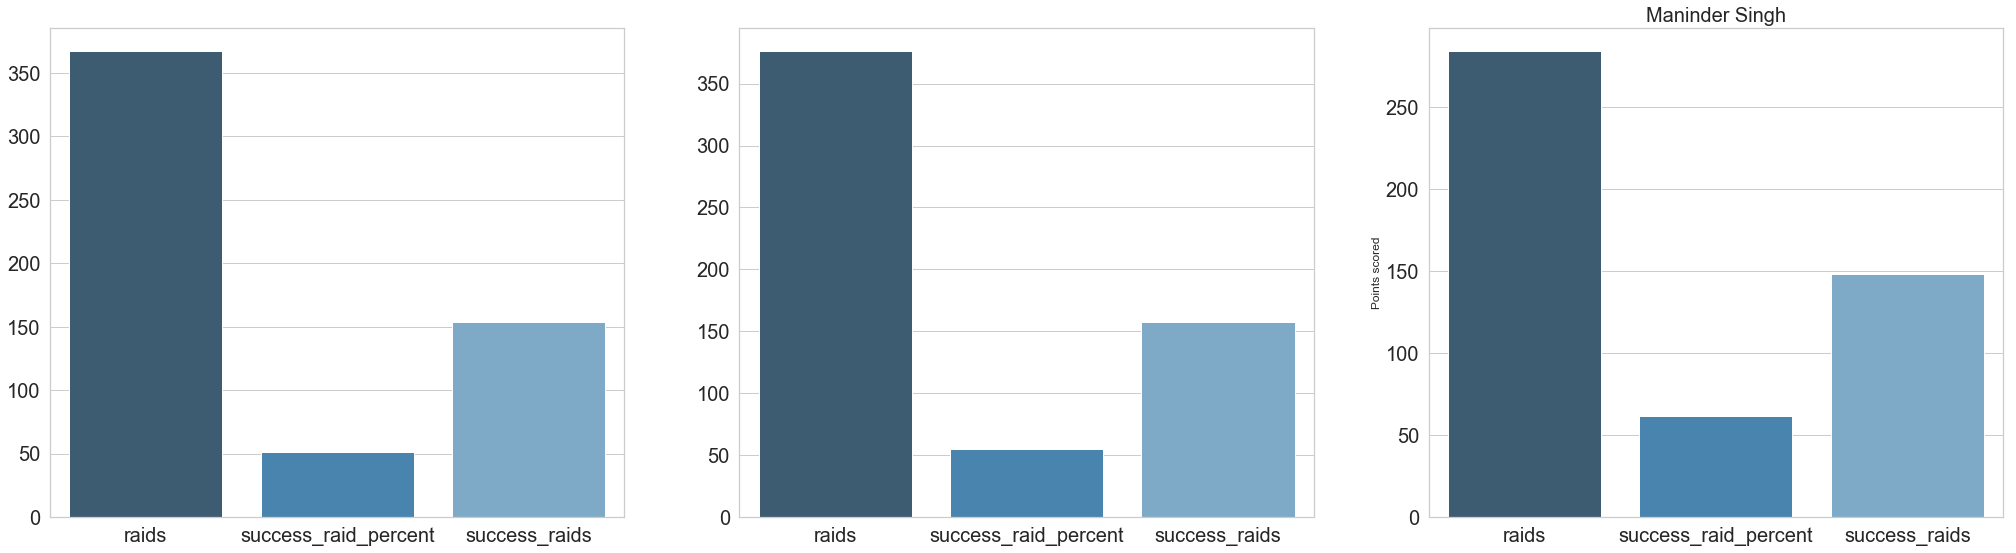

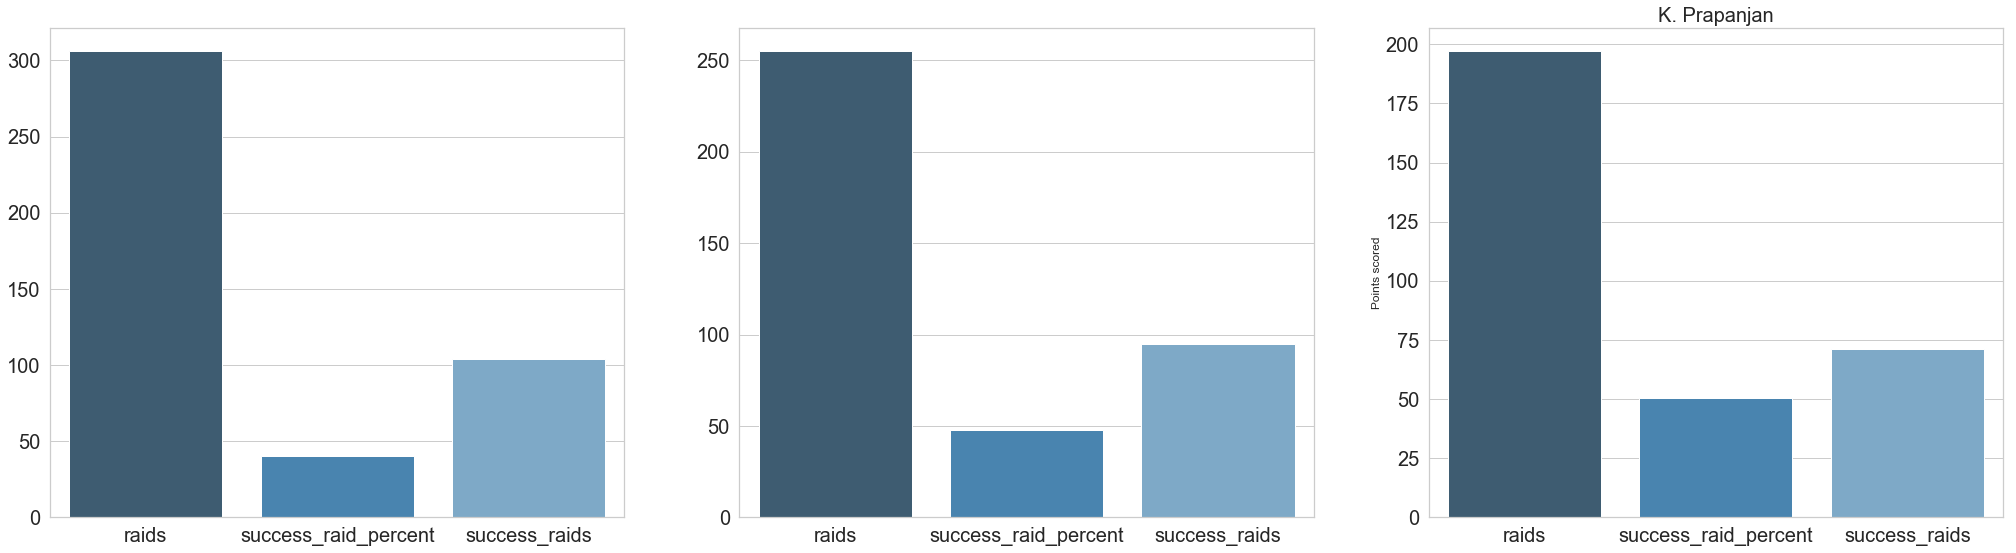

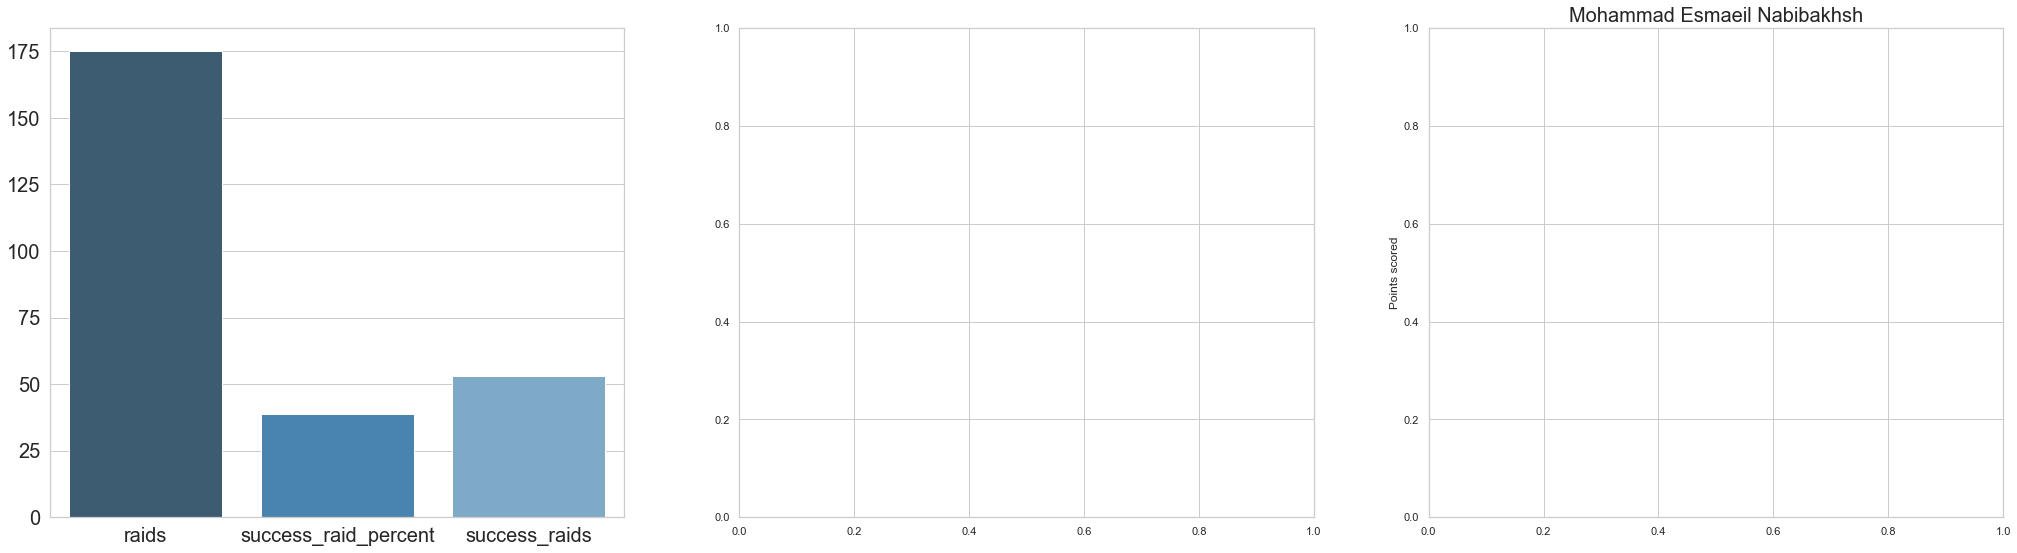

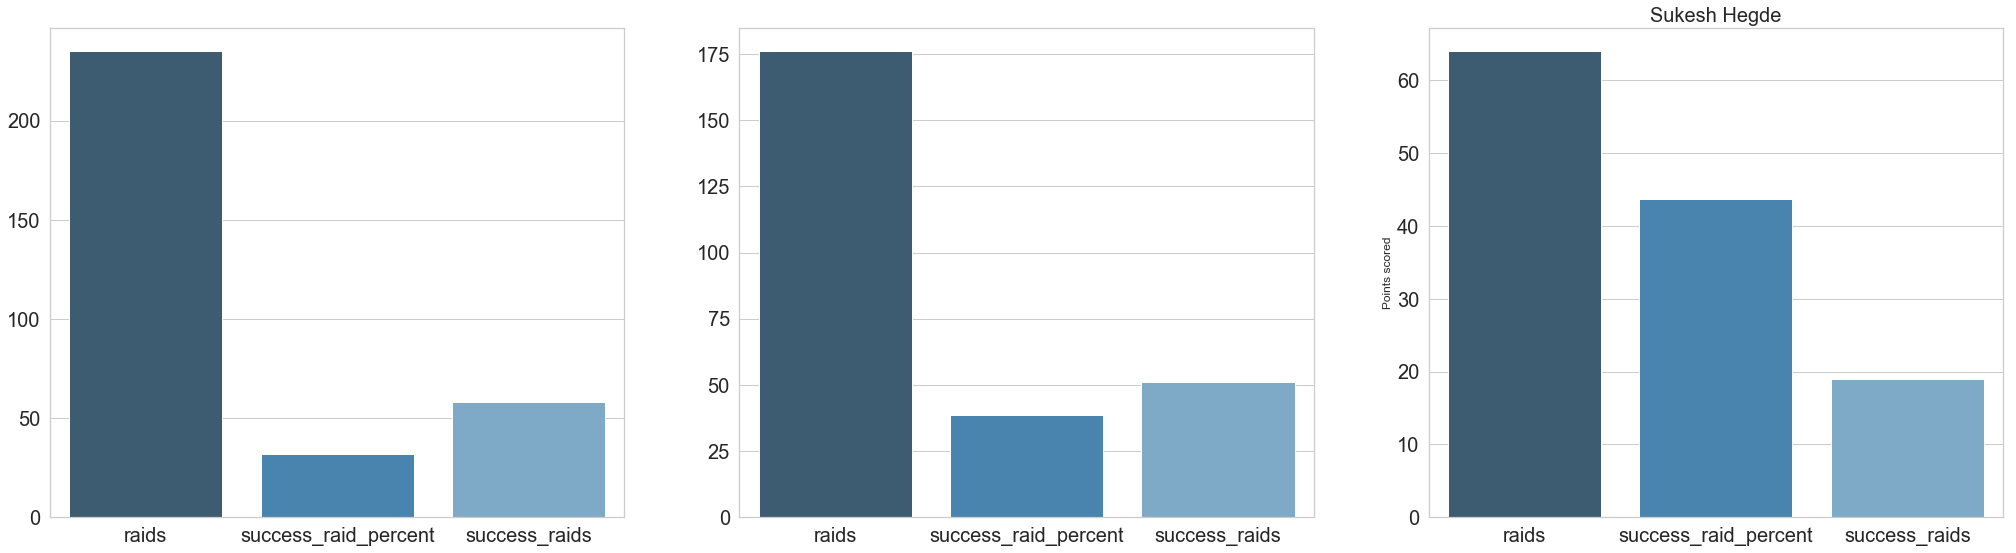

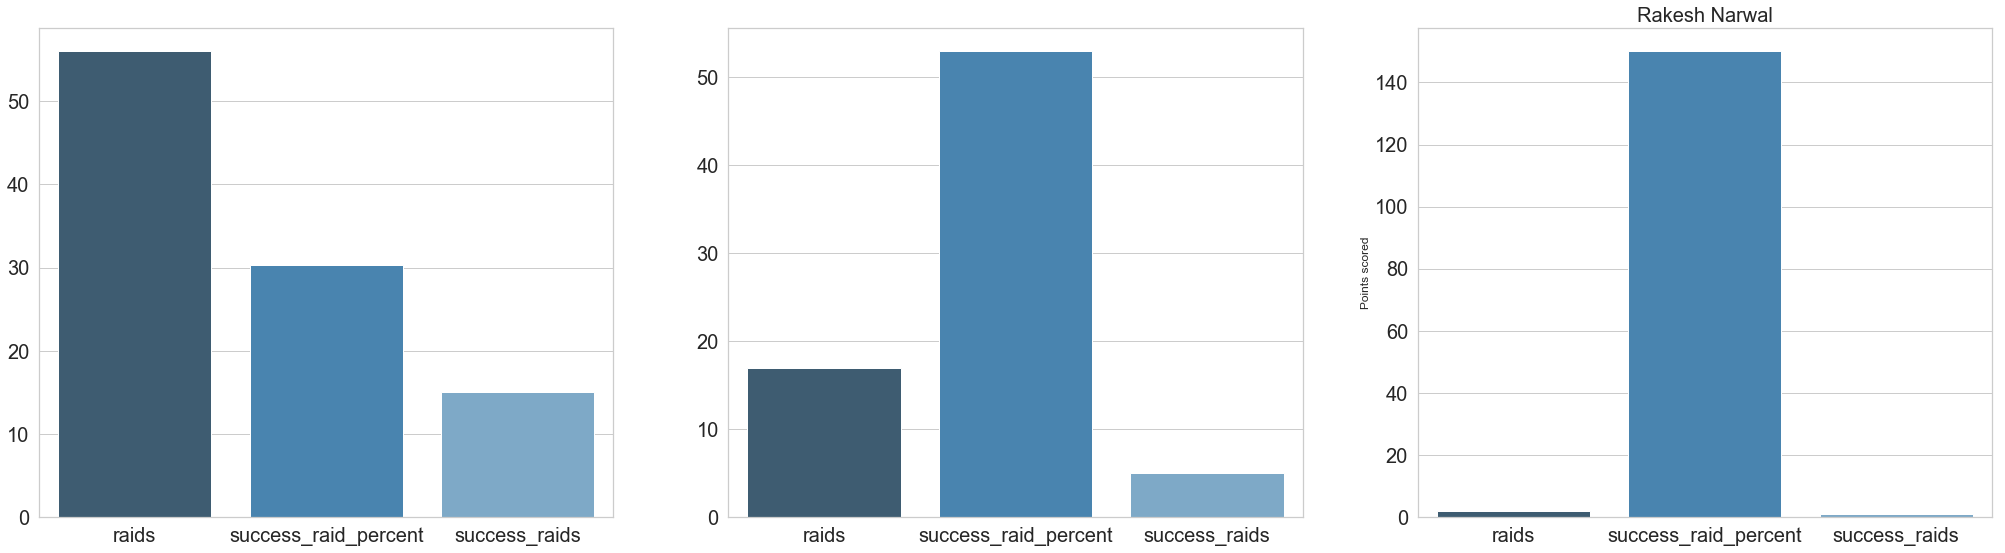

In [0]:
colList = ['name','success_raid_percent','raids','success_raids']
plot_player_data(dfToList_Bengal,colList)

Player not present in 8 season
Player not present in 26 season


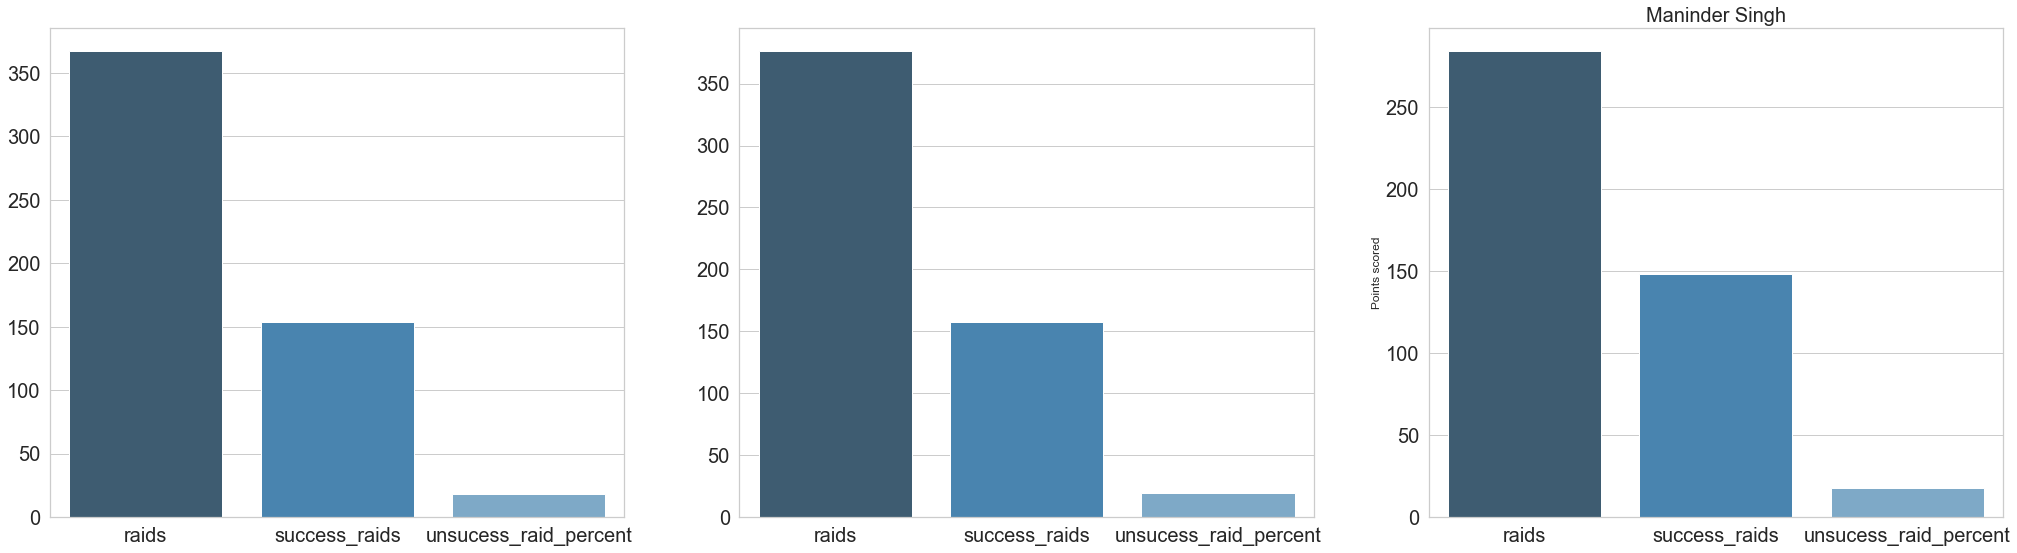

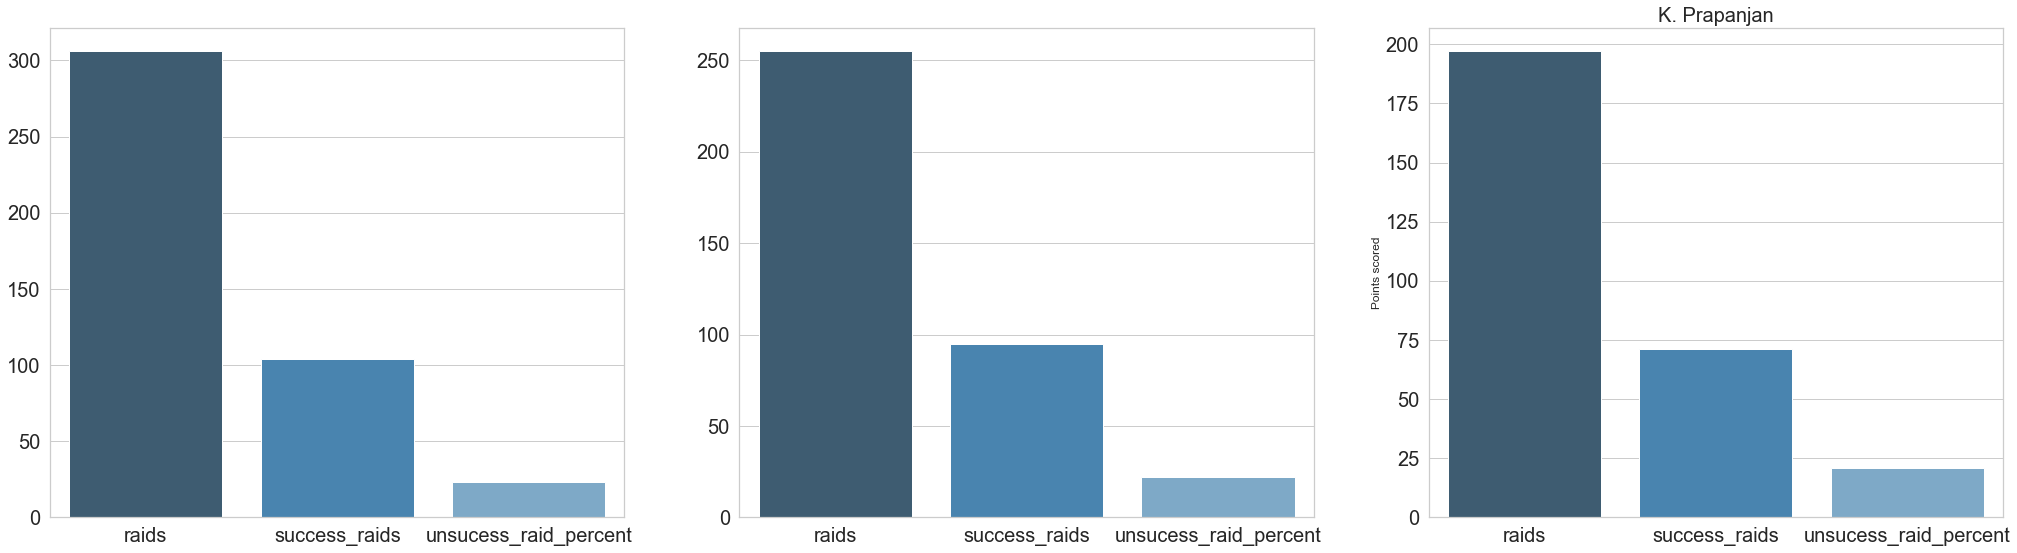

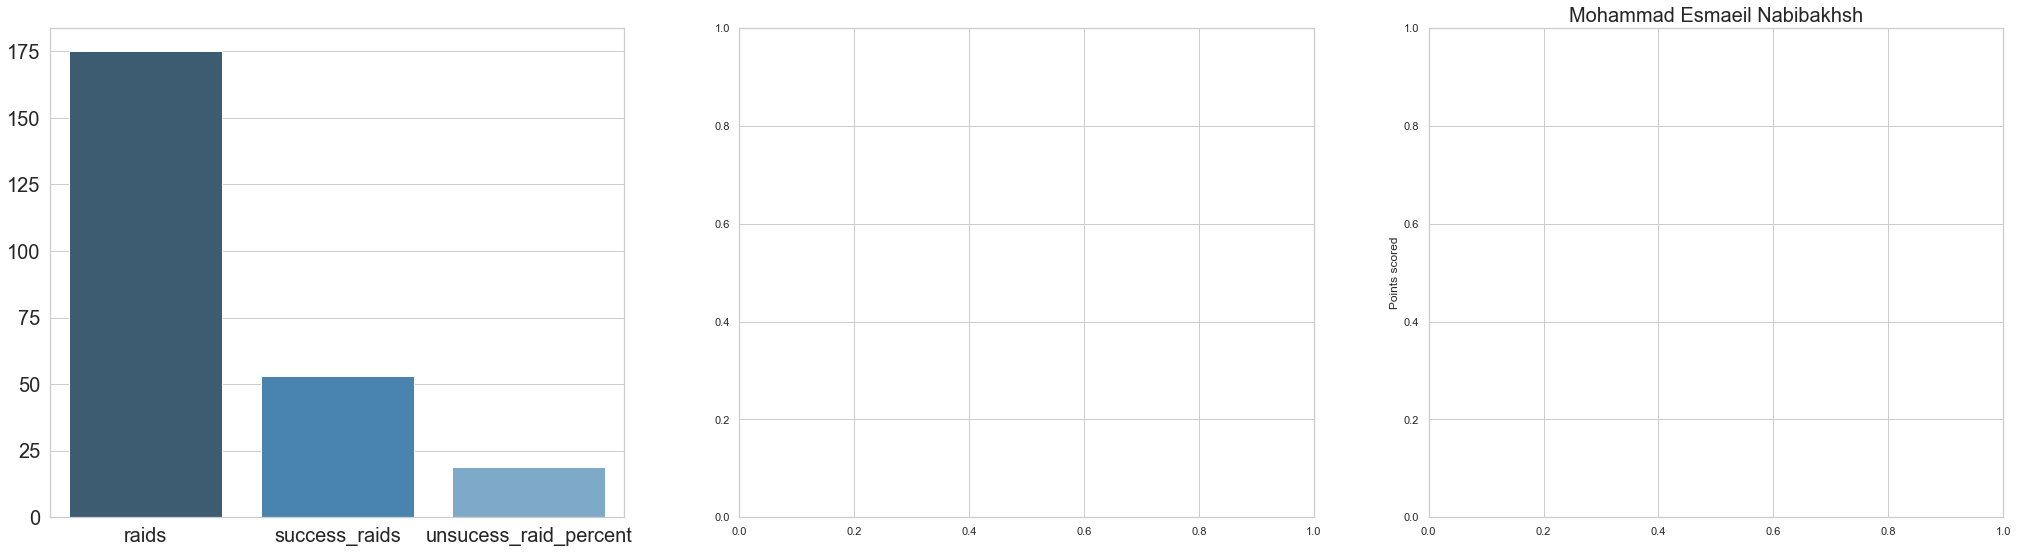

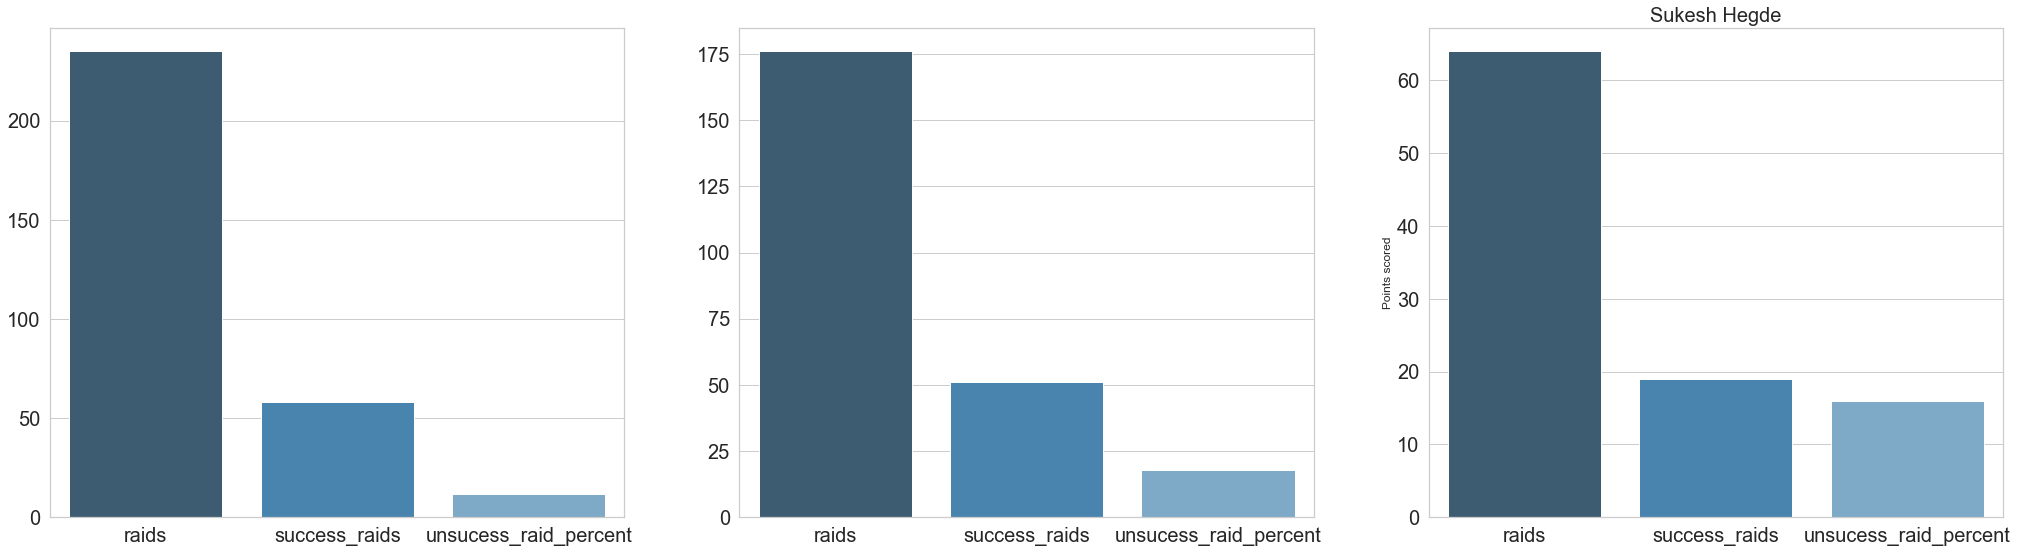

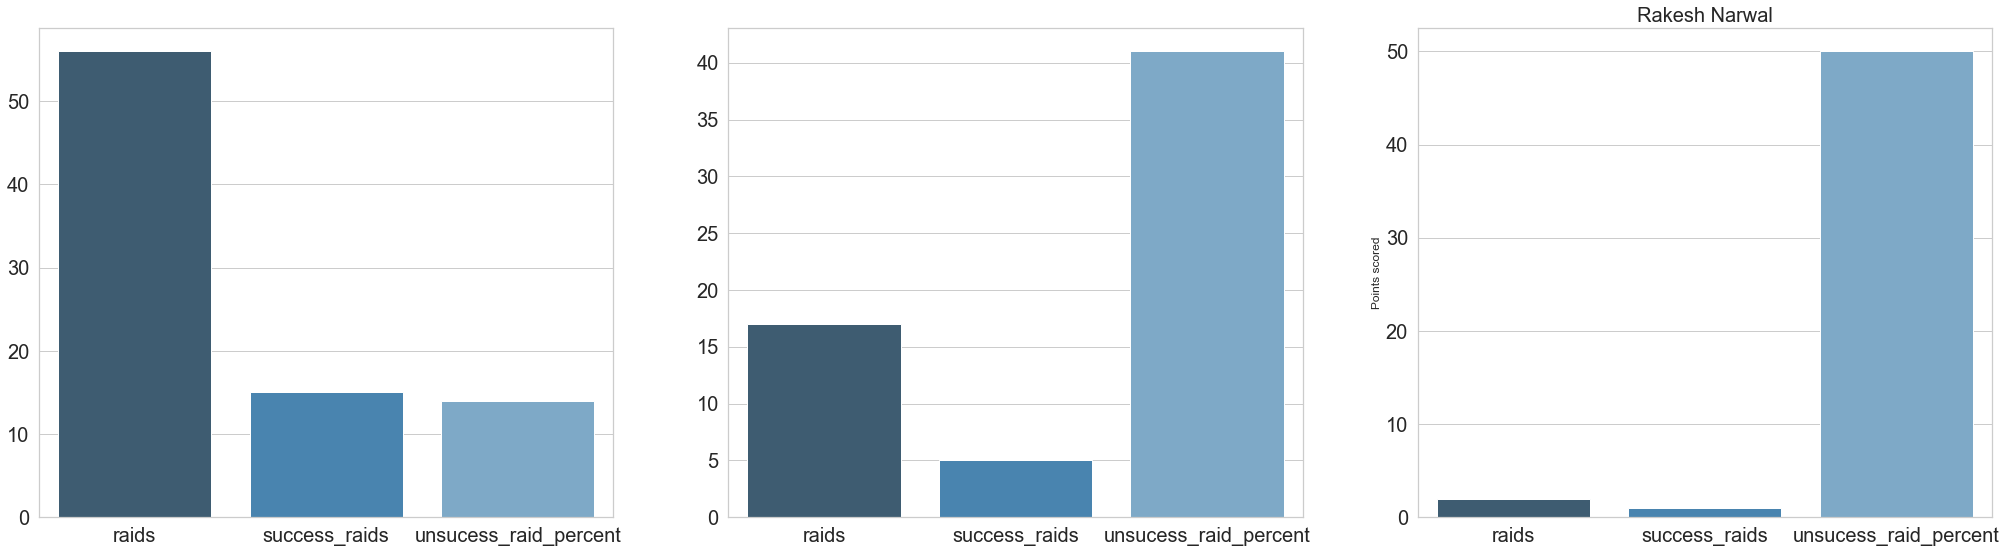

In [0]:
colList = ['name','unsucess_raid_percent','raids','success_raids']
plot_player_data(dfToList_Bengal,colList)


Player not present in 8 season
Player not present in 26 season


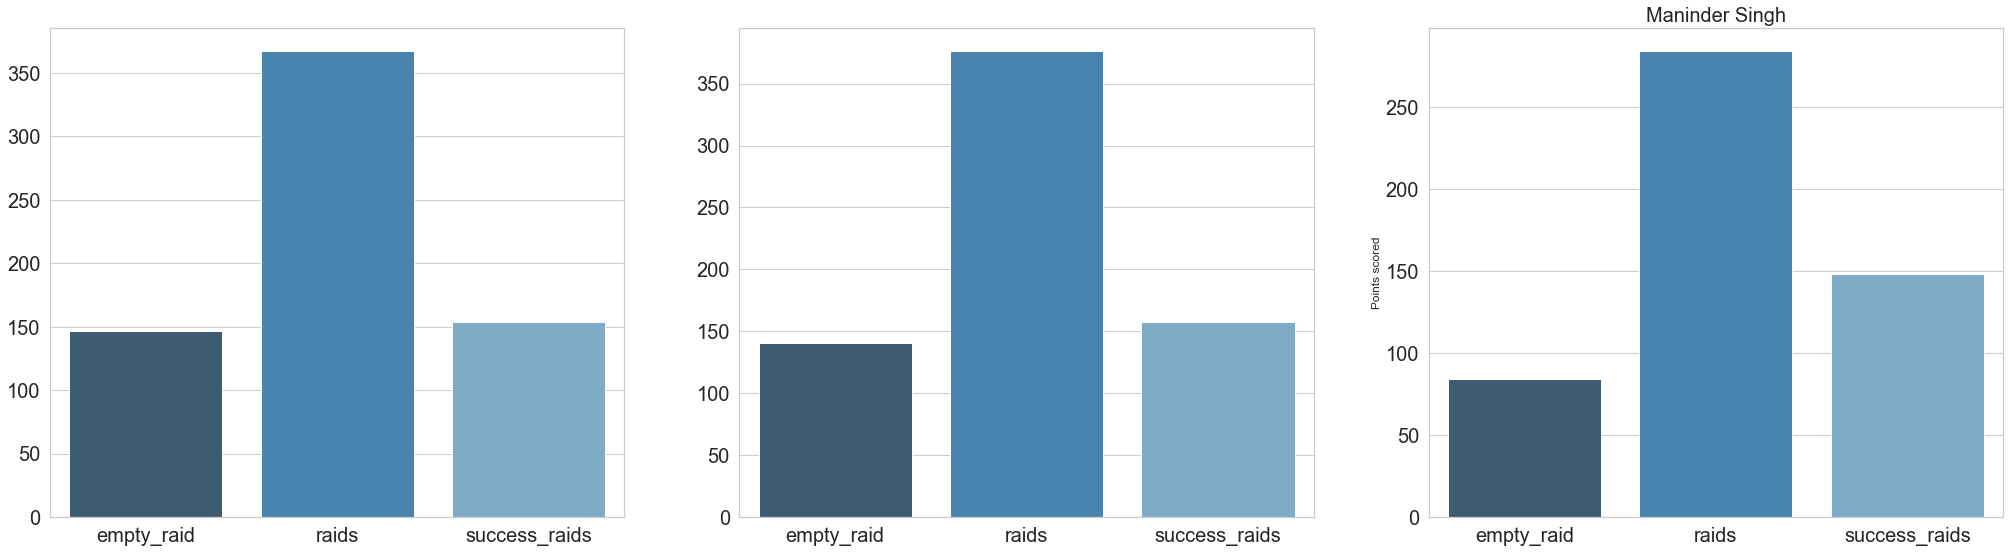

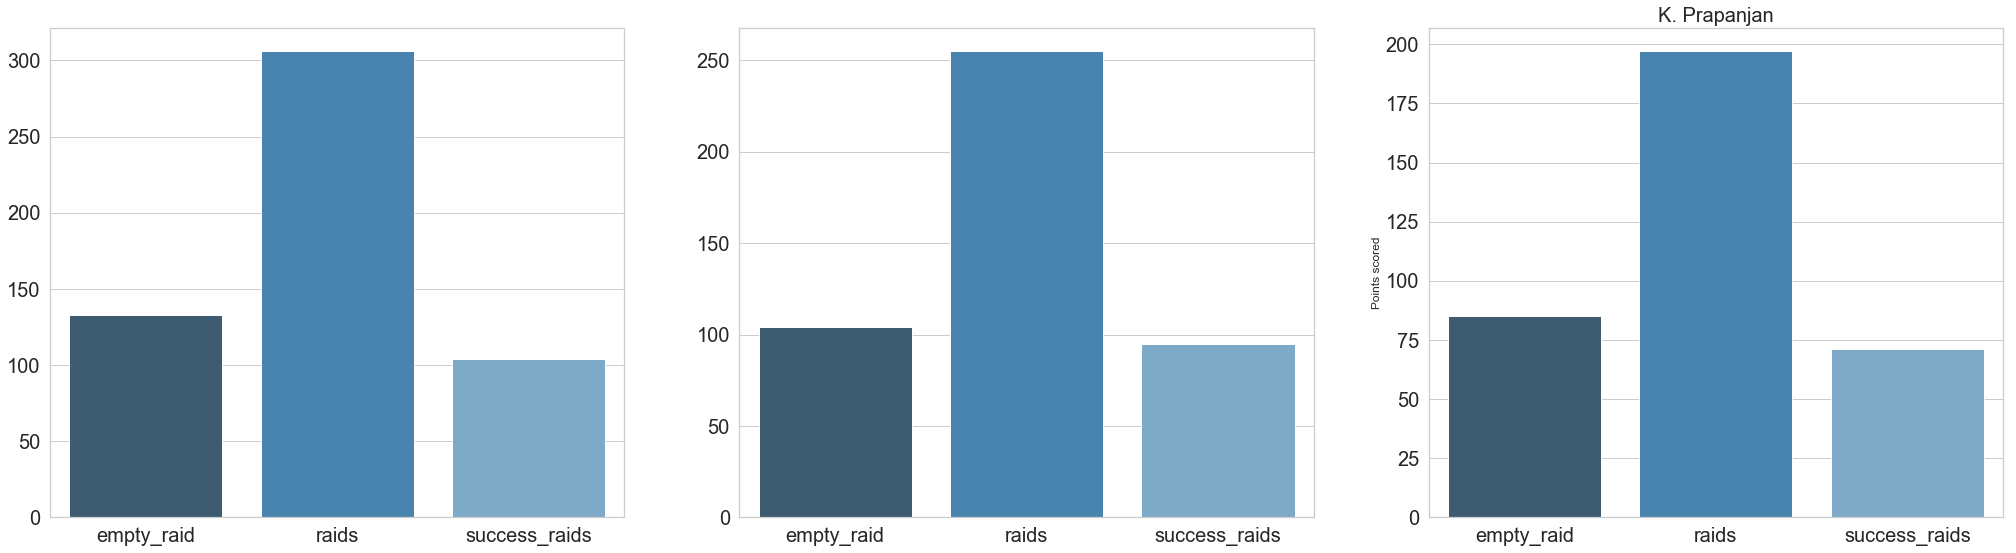

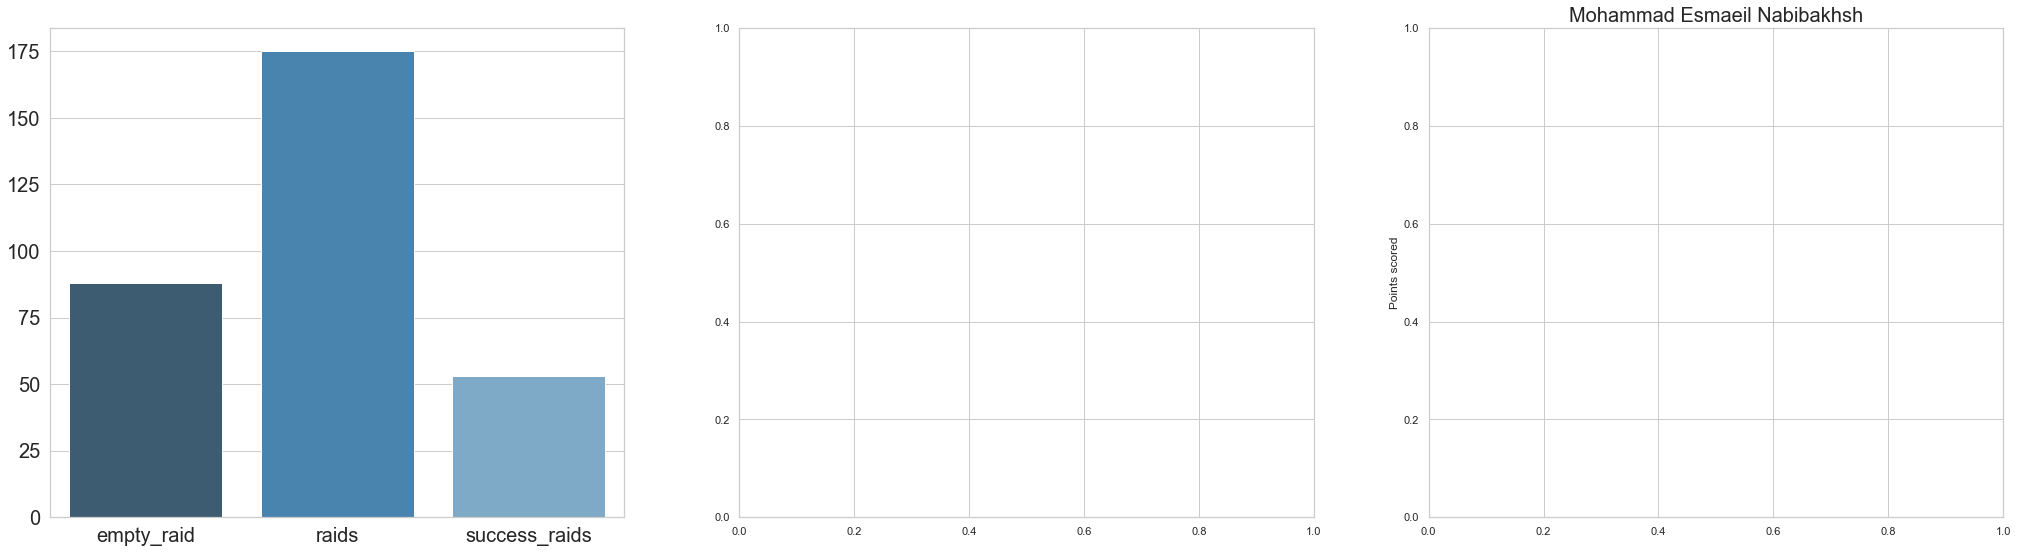

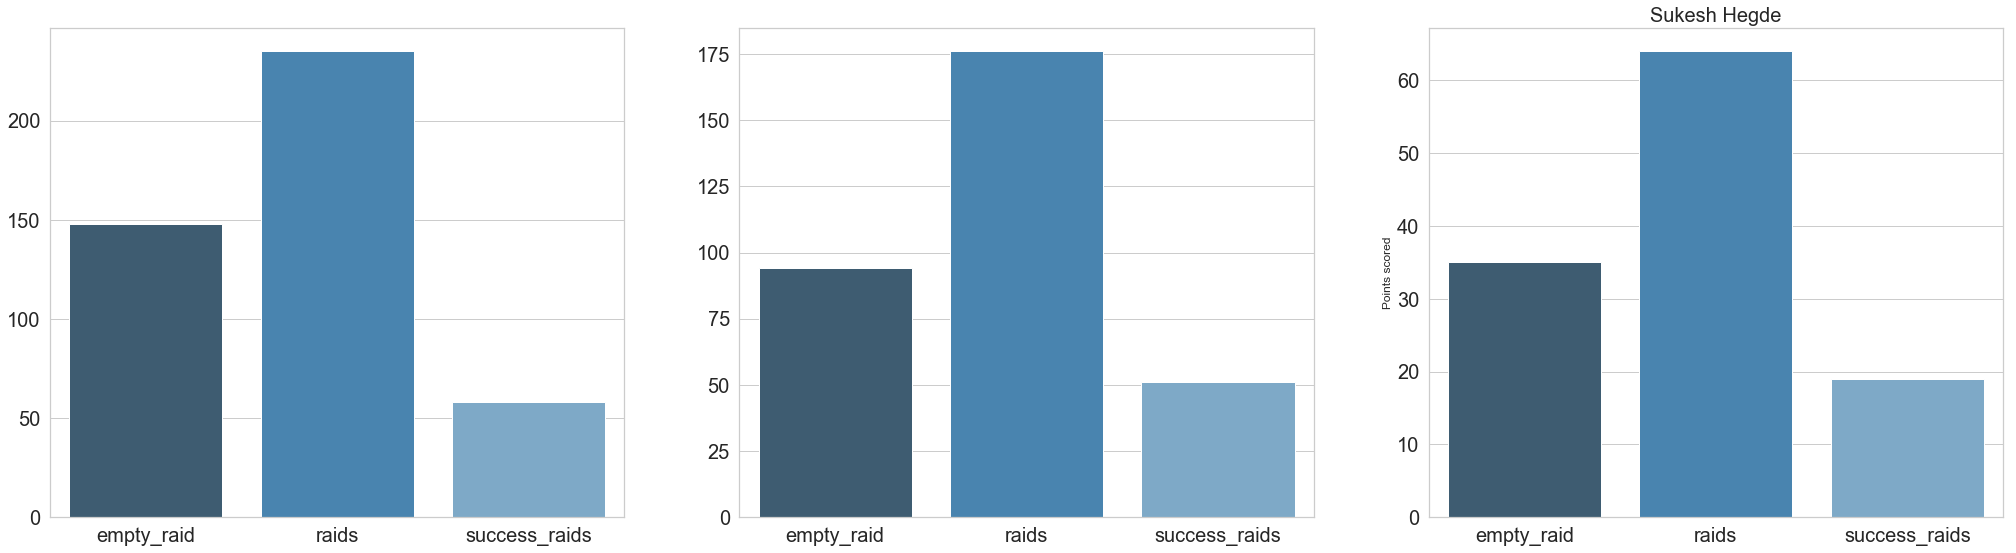

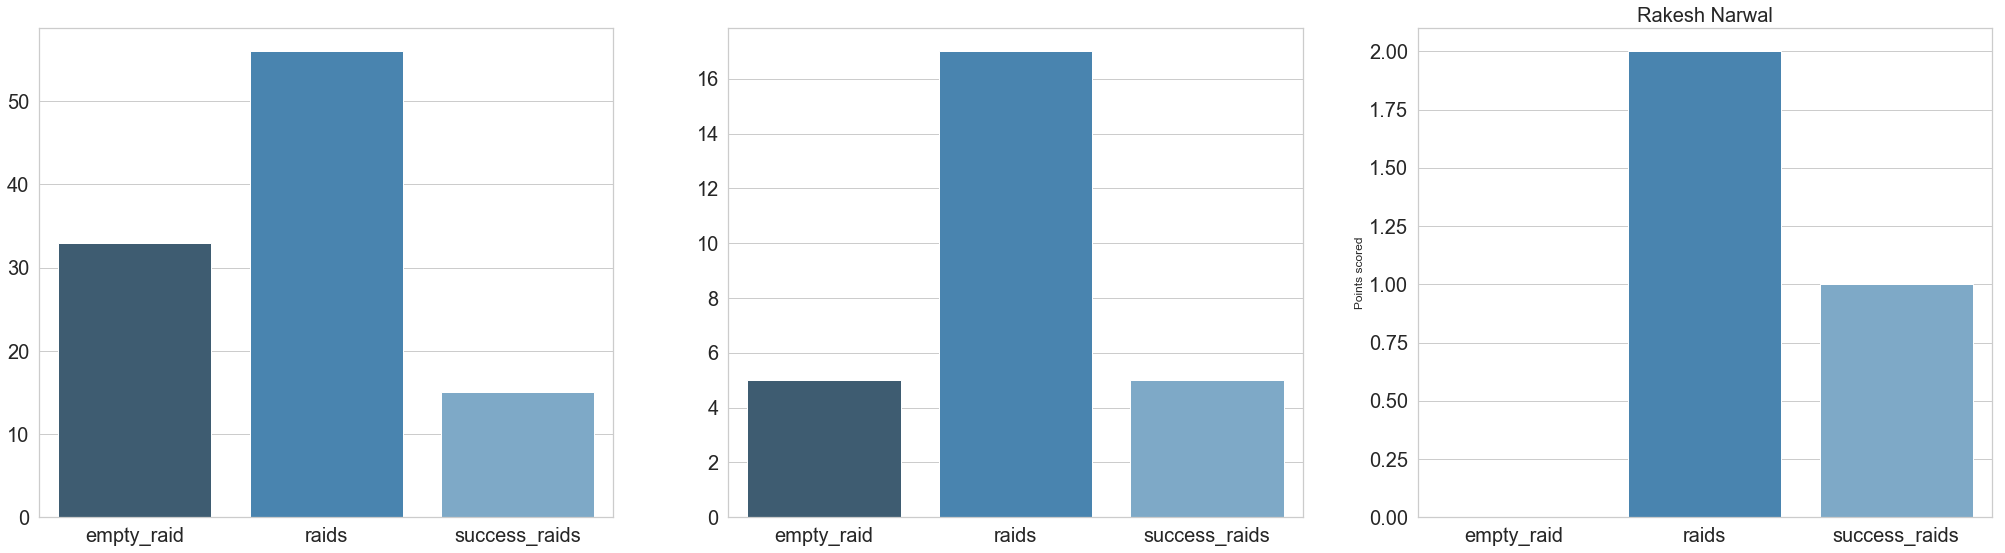

In [0]:
colList = ['name','empty_raid','raids','success_raids']
plot_player_data(dfToList_Bengal,colList)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Player not present in 8 season
Player not present in 26 season


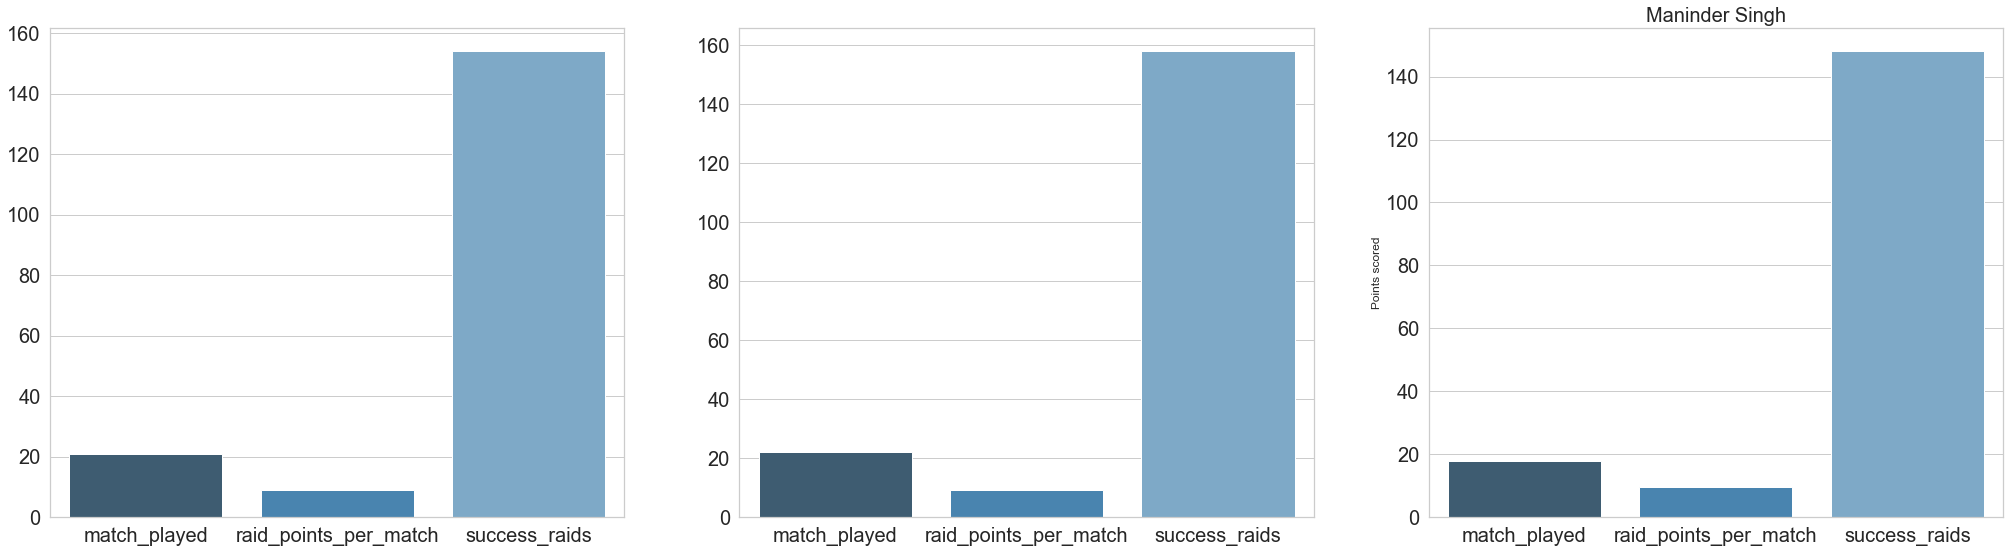

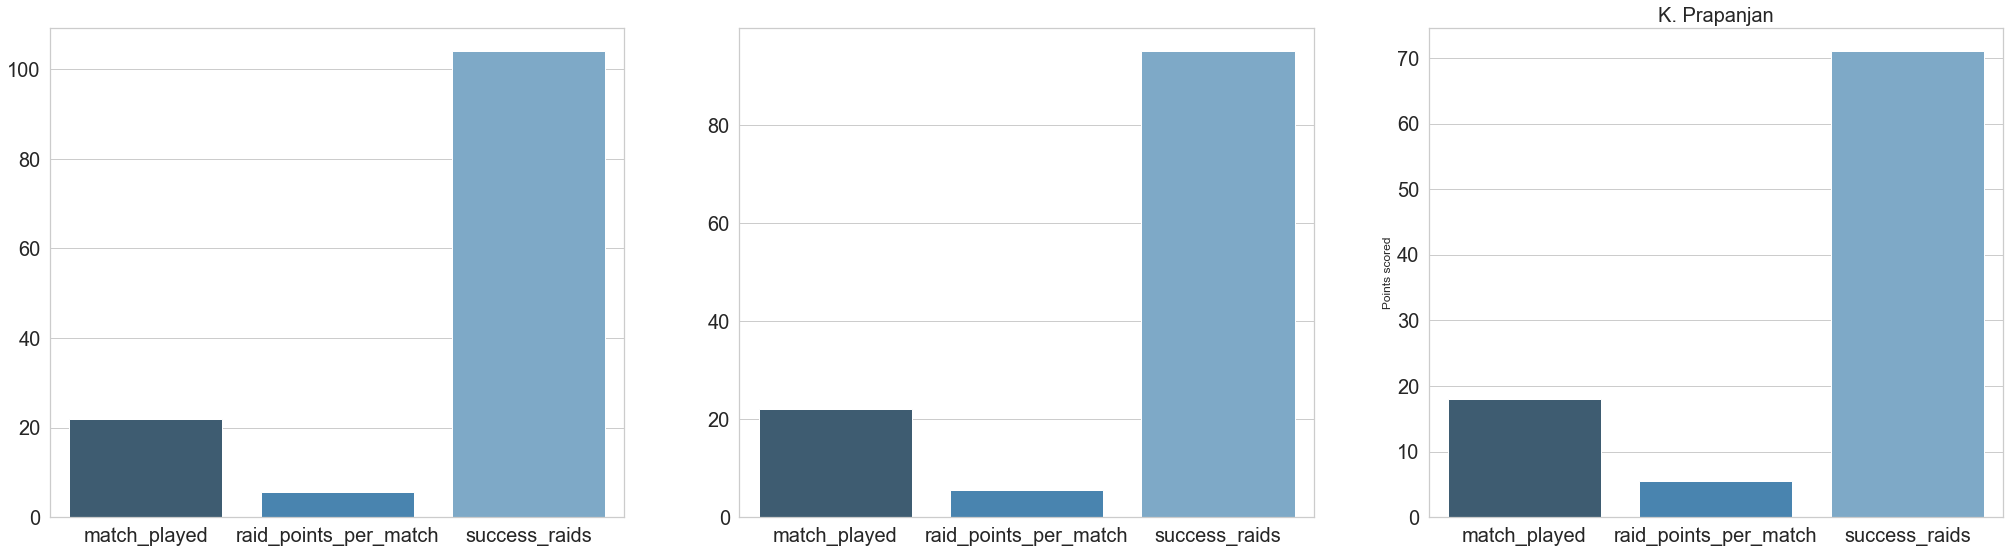

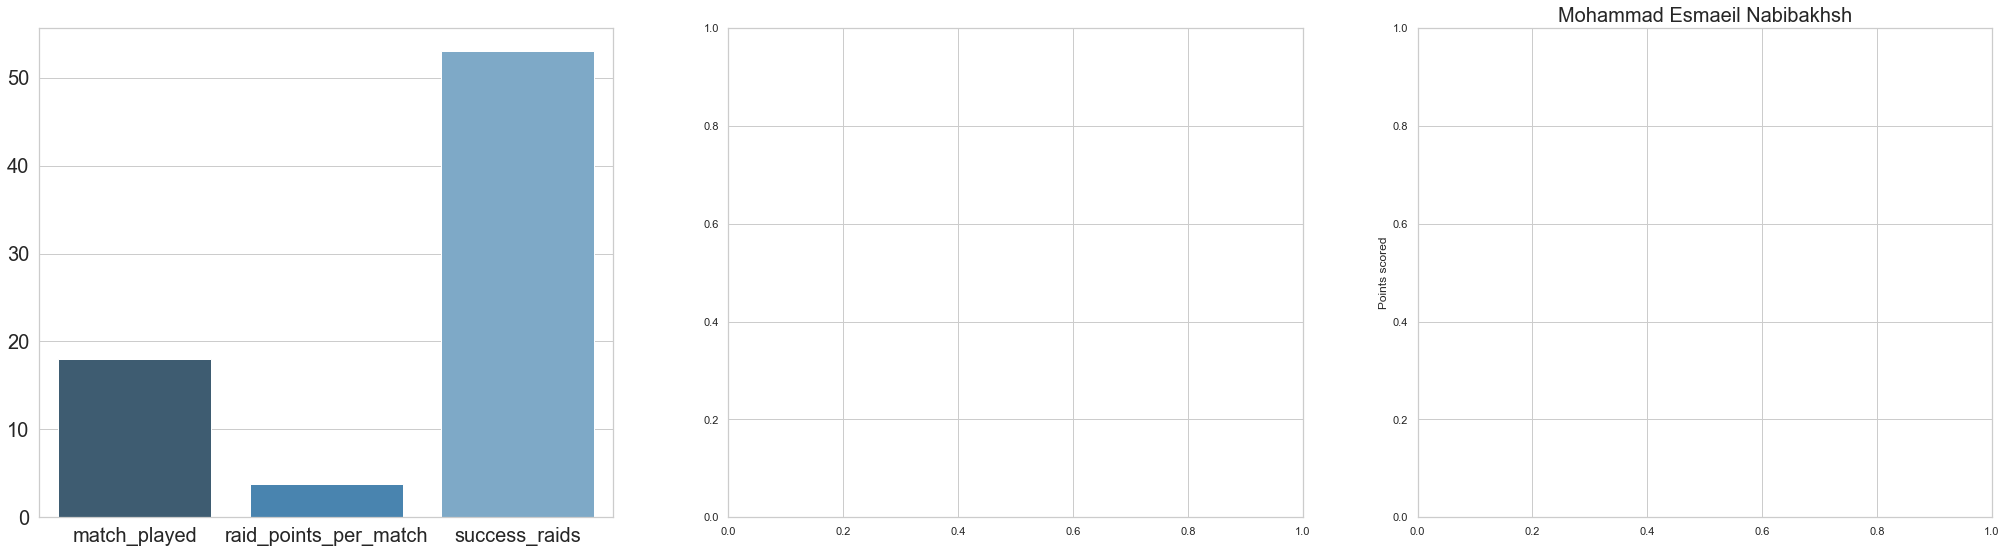

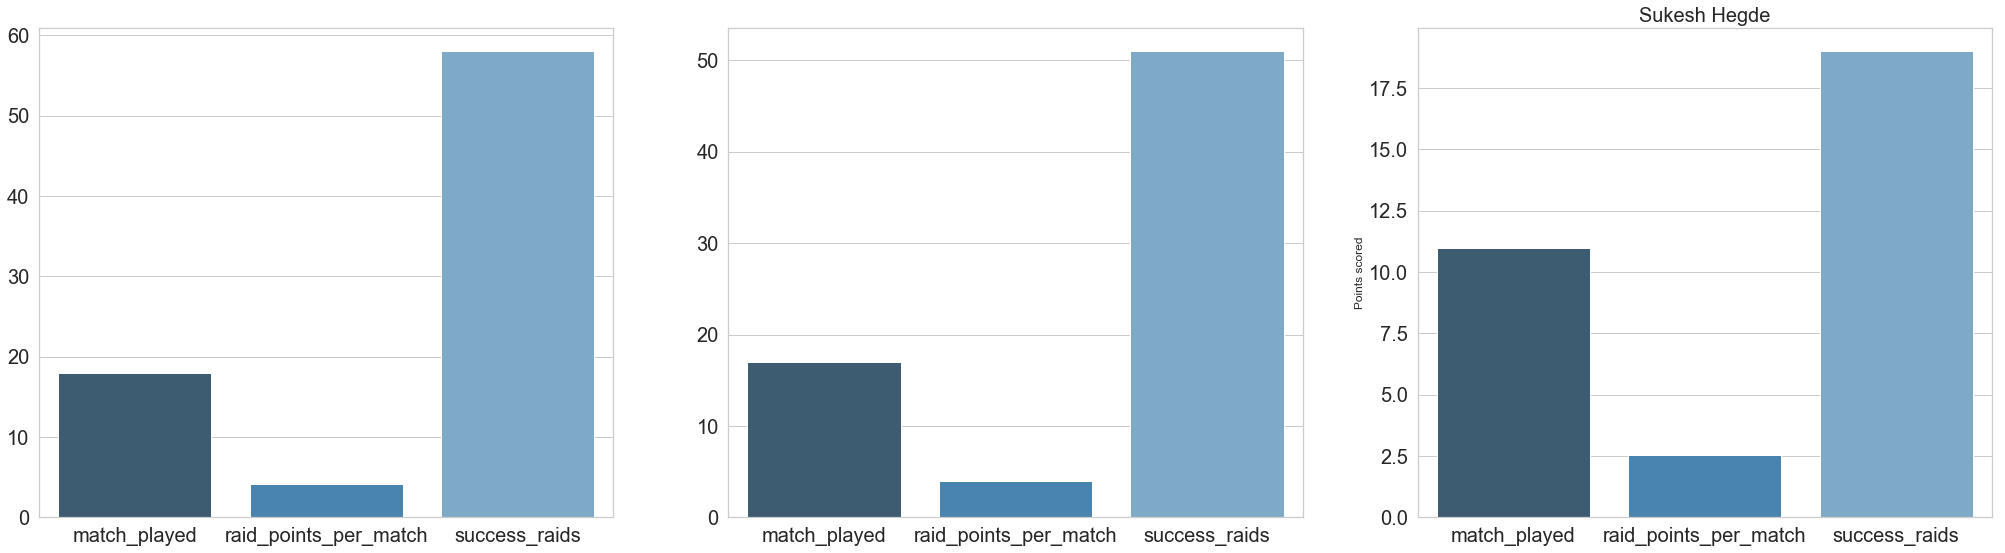

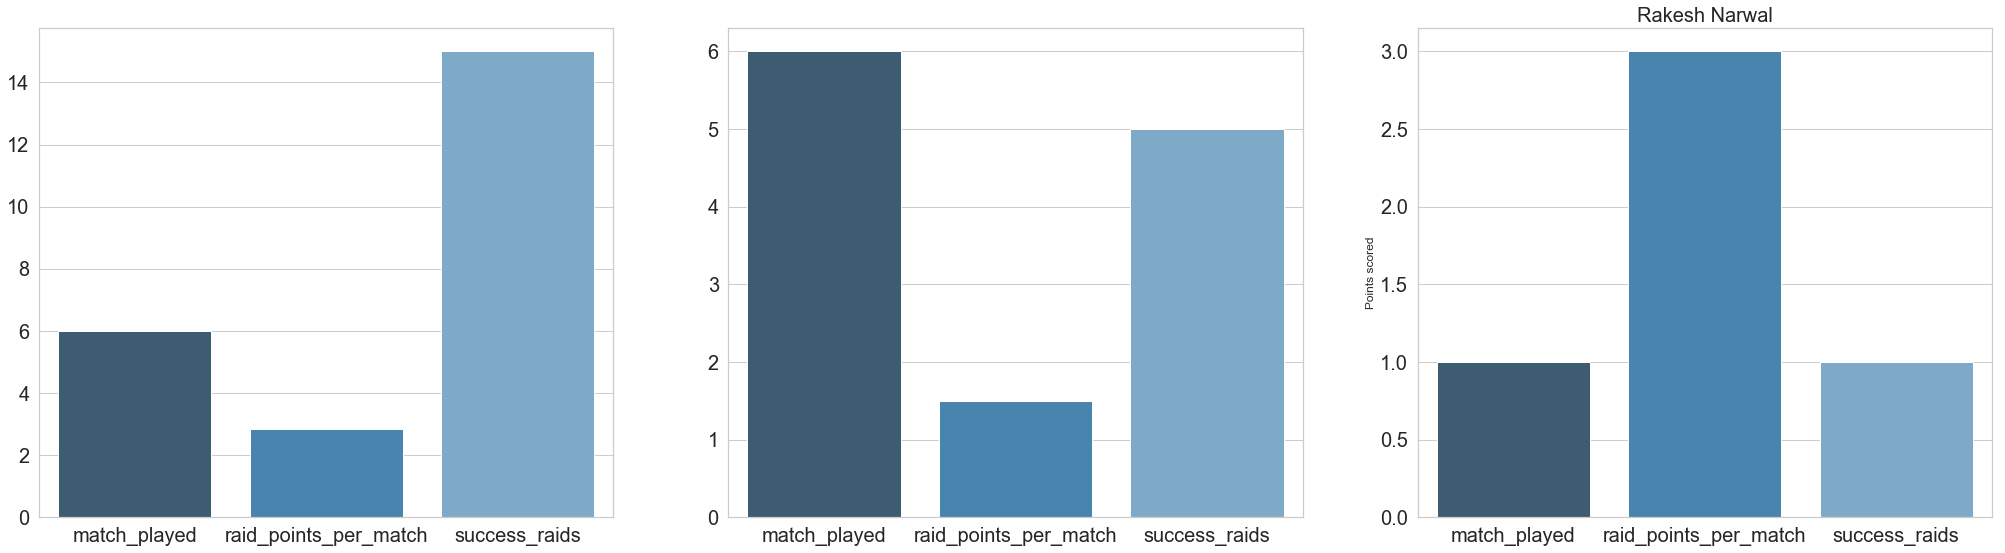

In [0]:
colList = ['name','raid_points_per_match','match_played','success_raids']
plot_player_data(dfToList_Bengal,colList)

In [0]:
player_data_Team =  player_seasonal_properties[49][player_seasonal_properties[49]['team_full_name'] == 'Bengaluru Bulls']
dfToList_Bangalore = player_data_Team['player_id'].tolist()

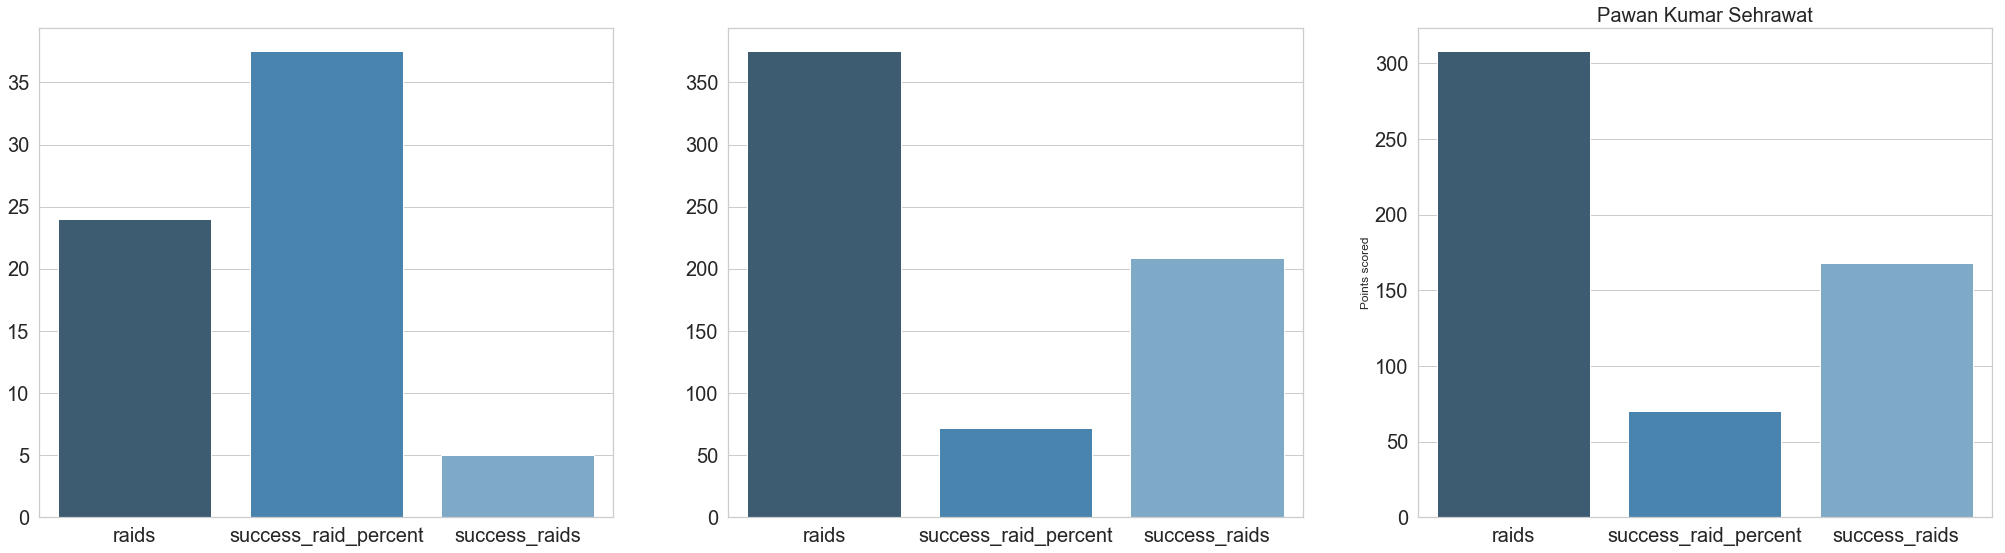

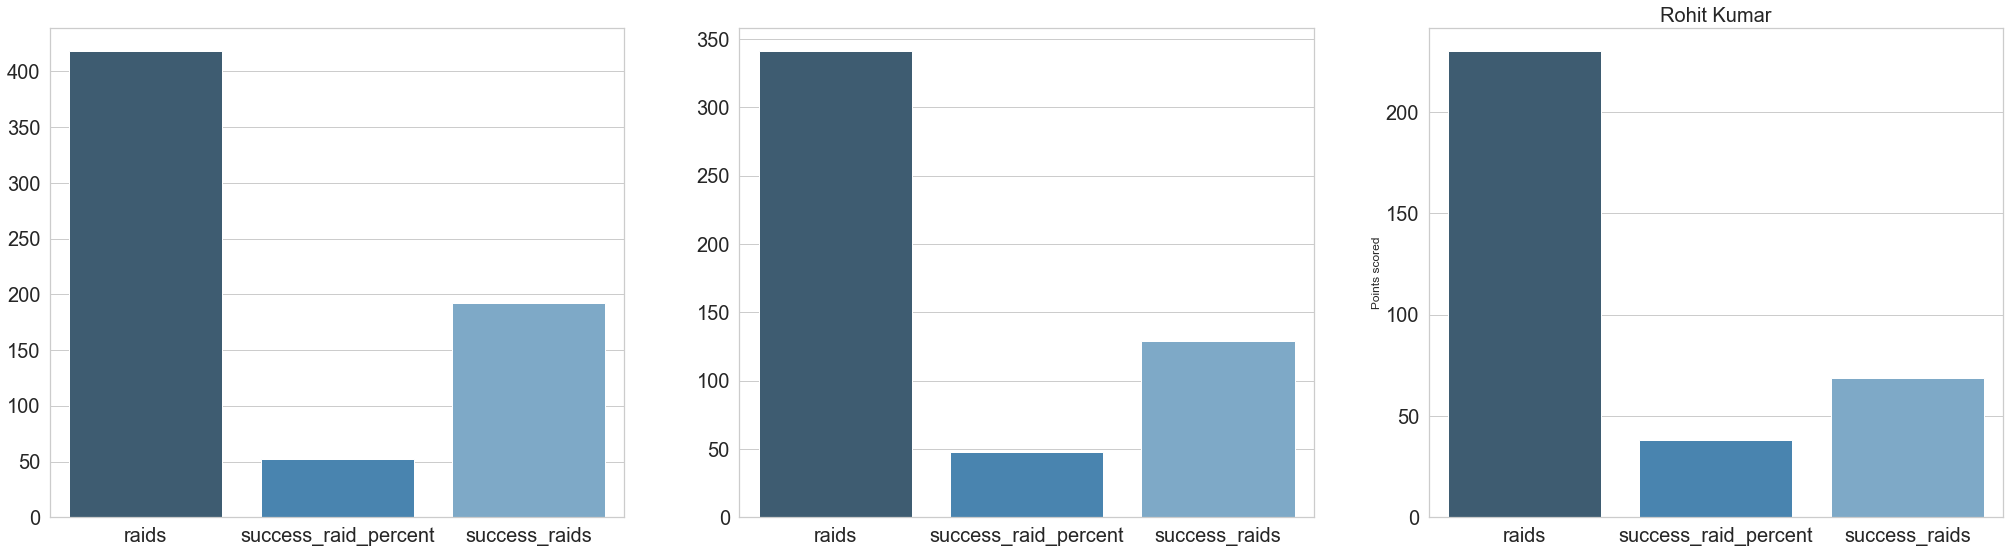

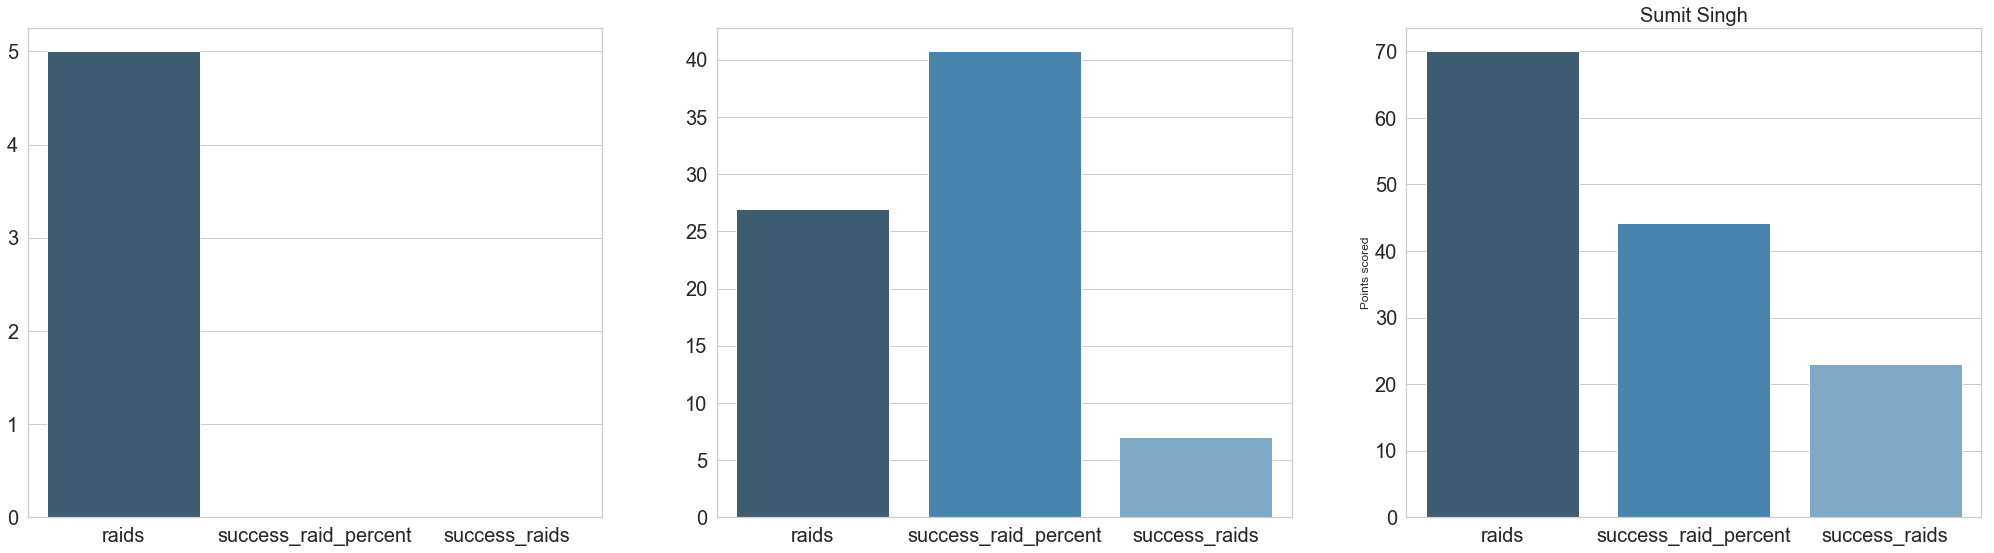

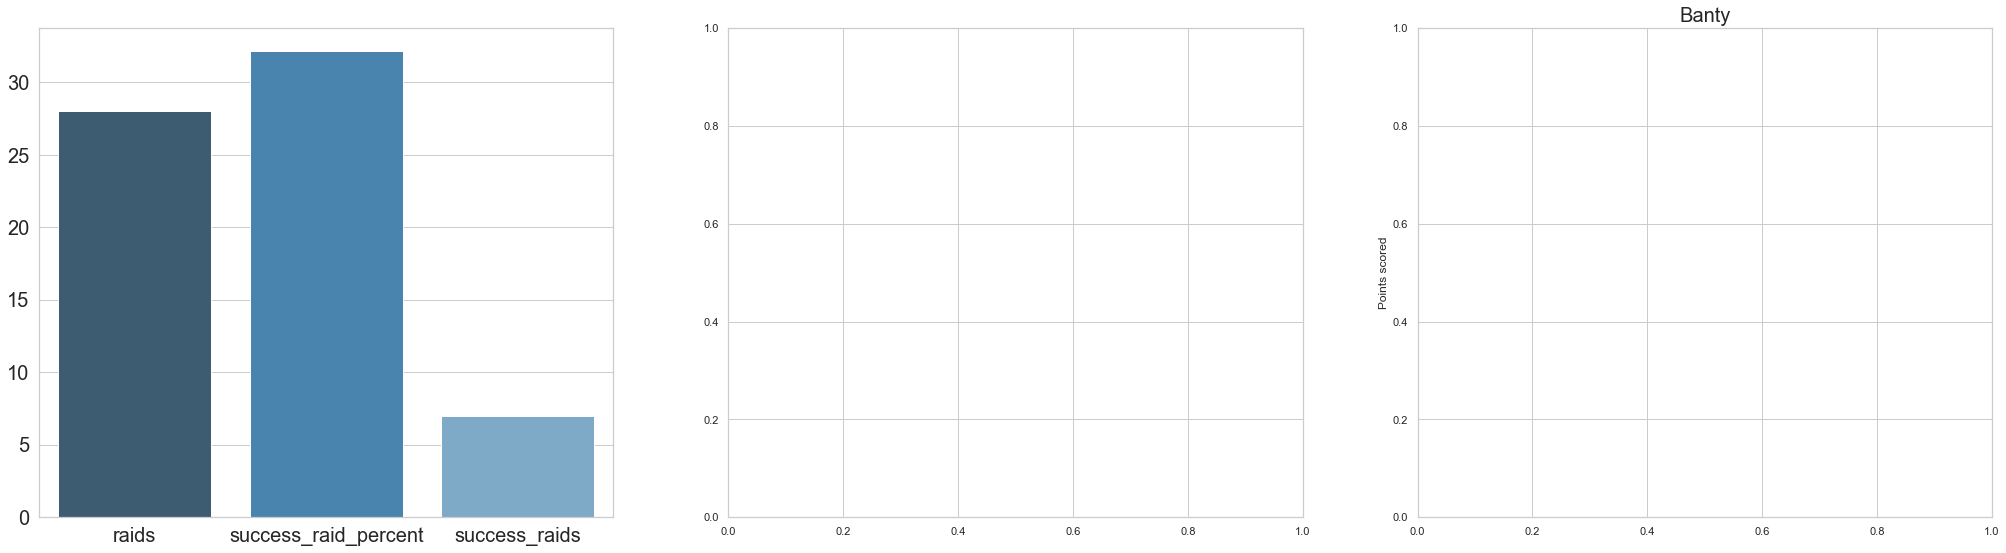

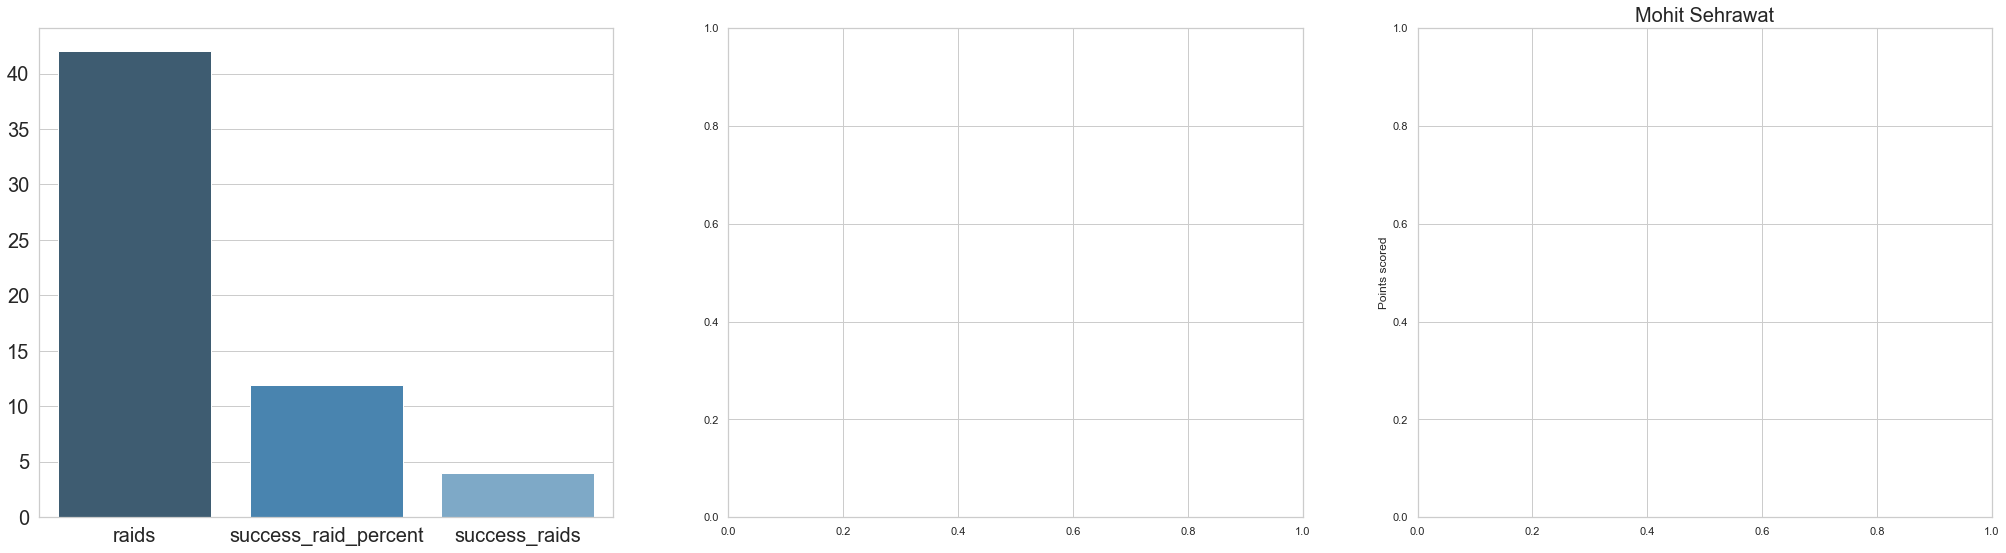

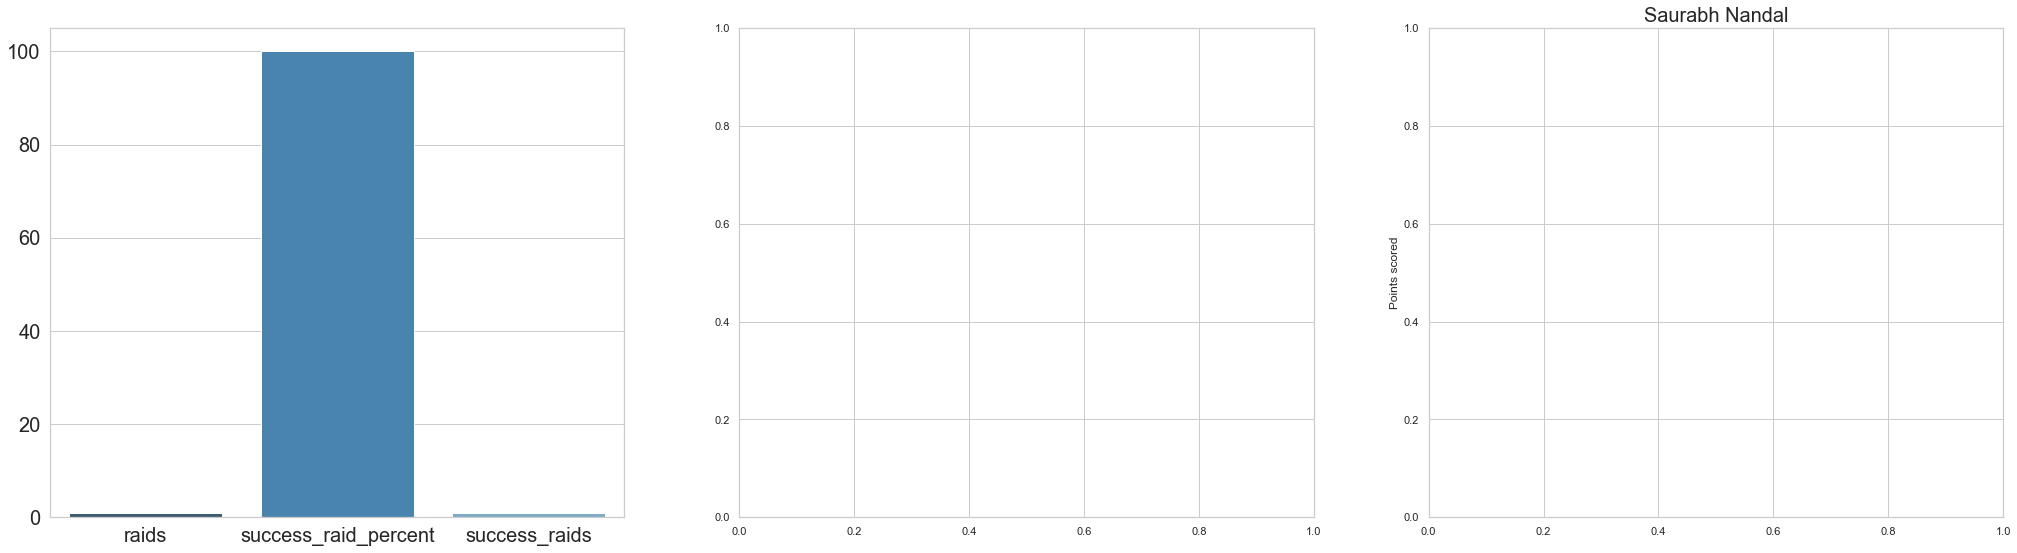

In [0]:
colList = ['name','success_raid_percent','raids','success_raids']
plot_player_data(dfToList_Bangalore,colList)

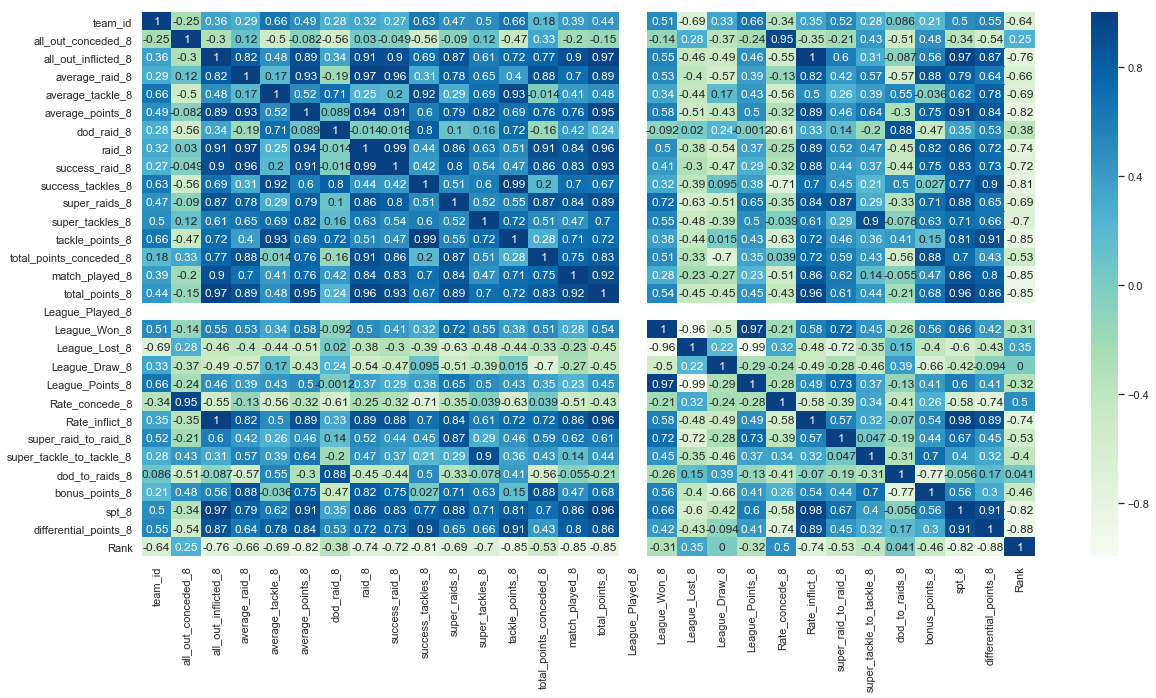

In [0]:
import seaborn as sns
loan_correlation = teams_final_dataset[8].corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True, cmap="GnBu")
plt.show()